In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

!pip install tensorflow
import tensorflow as tf

In [3]:
df = pd.read_csv('survey.csv')

In [4]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
def NullsCleaning(df):
    
    #No relevance for our model
    del df['comments']
    
    #We create a variable with the mode to fill those NANS
    mode_workinterfere = df['work_interfere'].mode()
    df['work_interfere'].fillna(mode_workinterfere[0], inplace = True)
    
    mode_self_employed = df['self_employed'].mode()
    df['self_employed'].fillna(mode_self_employed[0], inplace = True)
    
    return df

In [7]:
df_clean = NullsCleaning(df)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
data = df_clean

## Feature Engineering

In [10]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

C:\Users\nilra\AppData\Local\Temp\ipykernel_26400\894510929.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
C:\Users\nilra\AppData\Local\Temp\ipykernel_26400\894510929.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

## Encoding Features

In [12]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [13]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [14]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [15]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [16]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [17]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [18]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [21]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [22]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,2,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,1,Yes,2,5,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1257,46,0,0,0,No,2,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0


## Encoding Labels

In [23]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [25]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [27]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


## Splitting / Scaling data

In [28]:
y= data['treatment']
X = data.drop('treatment', axis=1).copy()

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 100)

## Training

In [31]:
X.shape

(1259, 149)

In [32]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.3% / 50.7%


In [33]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
12/12 [==============================] - 1s 32ms/step - loss: 0.6554 - accuracy: 0.6490 - auc: 0.7045 - val_loss: 0.7807 - val_accuracy: 0.6085 - val_auc: 0.6744 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4045 - accuracy: 0.8185 - auc: 0.8995 - val_loss: 0.7639 - val_accuracy: 0.6561 - val_auc: 0.6840 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3165 - accuracy: 0.8530 - auc: 0.9409 - val_loss: 0.8696 - val_accuracy: 0.6508 - val_auc: 0.6822 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.2290 - accuracy: 0.9099 - auc: 0.9730 - val_loss: 0.9309 - val_accuracy: 0.6349 - val_auc: 0.6818 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.1587 - accuracy: 0.9550 - auc: 0.9925 - val_loss: 1.0592 - val_accuracy: 0.6349 - val_auc: 0.6787 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 0s 17ms/step - los

12/12 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 2.1064 - val_accuracy: 0.6296 - val_auc: 0.6735 - lr: 1.0000e-07
Epoch 45/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 2.1064 - val_accuracy: 0.6296 - val_auc: 0.6735 - lr: 1.0000e-07
Epoch 46/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 2.1064 - val_accuracy: 0.6296 - val_auc: 0.6735 - lr: 1.0000e-07
Epoch 47/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 2.1065 - val_accuracy: 0.6296 - val_auc: 0.6735 - lr: 1.0000e-07
Epoch 48/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 2.1065 - val_accuracy: 0.6296 - val_auc: 0.6735 - lr: 1.0000e-07
Epoch 49/50
12/12 [==============================] - 0s 1

## Results

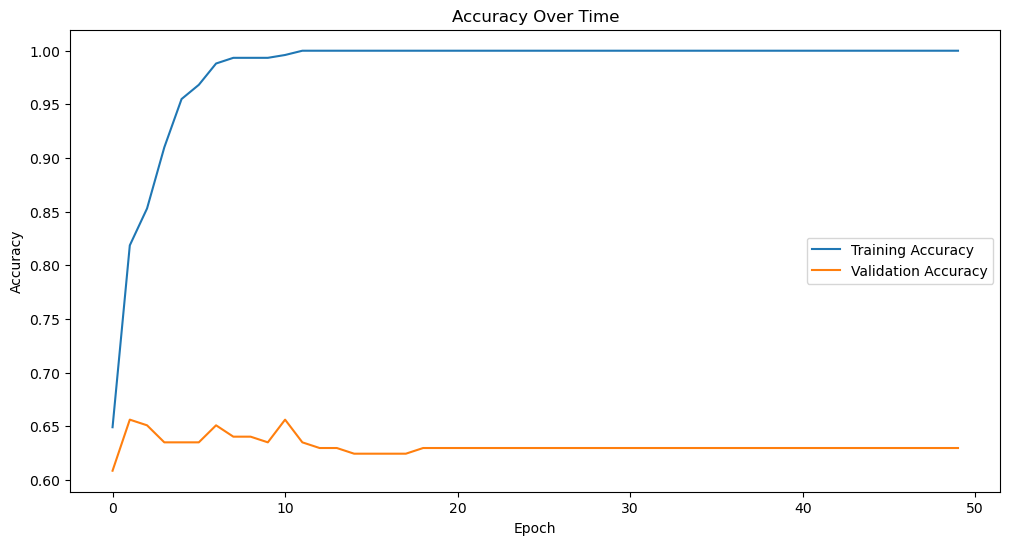

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [35]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.8524 - accuracy: 0.6698 - auc: 0.7213


[1.852378010749817, 0.6698412895202637, 0.7213367223739624]